In [2]:
from keras.models import load_model

In [3]:
# load model which is saved in model.h5 from train_model.ipynb
model = load_model('Model/model.h5')

In [4]:
# image size is 224 x 224
IMG_SIZE = 224
# number of images is 4
classes = ['Blue', 'New', 'Pond', 'Tar']


In [5]:
import numpy as np
import cv2
from mtcnn import MTCNN
from keras.preprocessing.image import img_to_array

In [6]:
def detect_face(img):
    detector = MTCNN()
    faces = detector.detect_faces(img)
    return faces[0]['box'] if len(faces) > 0 else None

In [7]:

def crop_face(img, box):
    x, y, w, h = box
    return img[y:y+h, x:x+w]

In [8]:
def preprocess(img):
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # convert to array
    img = img_to_array(img)

    # expand dimension to one sample
    img = np.expand_dims(img, axis=0)
    
    img = img.astype('float32')
    # normalize to the range 0-1
    img /= 255
    
    return img

In [9]:
def predict_img(img):

    box = detect_face(img)
    if box is not None:

        face = crop_face(img, box)
        # preprocess the image
        face = preprocess(face)

        # predict the class
        pred = model.predict(face)

        return pred, face[0], box
    else:
        print('No face detected')
        return None, None, None

In [10]:
def realtime_predict(path=None):
    if path is None:
        cap = cv2.VideoCapture(0)
    else:
        cap = cv2.VideoCapture(path)

    test_images = []
    
    while True:
        ret, frame = cap.read()

        res, face, box = predict_img(frame)
        if res is not None:

            cv2.rectangle(frame, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), (0, 255, 0), 2)

            names = [classes[i] for i in range(4)]
            cv2.putText(frame, str(names), (1, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            res = list(res[0])
            res = [round(i*100, 3) for i in res]
            res = [str(i)+'%' for i in res]
            cv2.putText(frame, str(res), (1, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            cv2.putText(frame, str(classes[np.argmax(res)]), (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

            cv2.imshow('frame', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        # save the image into test_images
        if cv2.waitKey(1) & 0xFF == ord('s') and len(test_images) < 3:
            test_images.append([frame, classes[np.argmax(res)]])
            print('Image saved')
        
    cap.release()
    cv2.destroyAllWindows()

    return test_images if len(test_images) > 0 else None

In [33]:
# test on video or webcam
test_images = realtime_predict()

1/1 [==============================] - 0s 128ms/step
No face detected
1/1 [==============================] - 0s 112ms/step
No face detected
1/1 [==============================] - 0s 151ms/step
No face detected
1/1 [==============================] - 0s 155ms/step
No face detected
1/1 [==============================] - 0s 128ms/step
No face detected
1/1 [==============================] - 0s 156ms/step
No face detected
2/2 [==============================] - 0s 9ms/step
No face detected
1/1 [==============================] - 0s 155ms/step
No face detected
1/1 [==============================] - 0s 131ms/step
No face detected
1/1 [==============================] - 0s 122ms/step
No face detected
1/1 [==============================] - 0s 158ms/step
No face detected
4/4 [==============================] - 0s 10ms/step
No face detected
1/1 [==============================] - 0s 133ms/step
No face detected
2/2 [==============================] - 0s 8ms/step
No face detected
1/1 [====================

In [12]:
# import matplotlib.pyplot as plt

# if test_images is not None:
#     # plot 3 images
#     plt.figure(figsize=(15, 15))
#     for i in range(len(test_images)):
#         plt.subplot(1, 3, i+1)
#         plt.title(test_images[i][1])
#         plt.imshow(cv2.cvtColor(test_images[i][0], cv2.COLOR_BGR2RGB))
#         plt.axis('off')
#     plt.show()
    

## Evaluate

In [13]:
import os


In [14]:
test_path = 'Test/Images/'

In [15]:
def load_data(dir_path, image_width, image_height):
    X = []
    y = []
    label = dict()
    i = 0
    for file in os.listdir(dir_path):
        label[i] = file
        for image in os.listdir(dir_path + '/' + file):
            img = cv2.imread(dir_path + '/' + file + '/' + image)
            float_img = img.astype('float32')/255
            resize_img = cv2.resize(float_img, (image_width, image_height))
            X.append(resize_img)
            y.append(i)
        i += 1
    X = np.array(X)
    y = np.array(y)
    
    return X, y, label

In [16]:
X_test, y_test, label = load_data(test_path, IMG_SIZE, IMG_SIZE)

In [17]:
# one hot encoding for y_test
from keras.utils import to_categorical
y_test = to_categorical(y_test)

In [18]:
y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]],

In [19]:
# predict on test data
y_pred = model.predict(X_test)

2/2 [==============================] - 10s 2s/step


In [20]:
y_pred

array([[9.09001172e-01, 7.78864473e-02, 9.42878891e-03, 3.68364621e-03],
       [8.63455296e-01, 1.49669300e-03, 1.30259320e-01, 4.78876894e-03],
       [9.96809065e-01, 1.92733551e-05, 3.16019403e-03, 1.15407065e-05],
       [9.24781084e-01, 5.29446916e-05, 7.51056075e-02, 6.03590197e-05],
       [9.99408960e-01, 2.78829044e-04, 2.95264559e-04, 1.69414507e-05],
       [9.15847600e-01, 6.69128785e-05, 8.39388296e-02, 1.46657156e-04],
       [9.92428482e-01, 2.18943819e-06, 7.56238867e-03, 6.95453082e-06],
       [9.99783933e-01, 3.60905887e-07, 1.28734857e-04, 8.69931246e-05],
       [9.97354627e-01, 6.69995507e-06, 1.27767888e-03, 1.36106694e-03],
       [9.99947667e-01, 5.71269823e-07, 4.78341426e-05, 3.92123047e-06],
       [4.16485429e-01, 5.14889657e-01, 7.42640533e-03, 6.11985028e-02],
       [9.68080014e-04, 9.91982043e-01, 6.55874889e-03, 4.91059909e-04],
       [1.98124126e-02, 9.79763329e-01, 1.79613926e-04, 2.44743860e-04],
       [4.43106502e-01, 4.66271639e-01, 6.24621147e

In [21]:
y_pred

array([[9.09001172e-01, 7.78864473e-02, 9.42878891e-03, 3.68364621e-03],
       [8.63455296e-01, 1.49669300e-03, 1.30259320e-01, 4.78876894e-03],
       [9.96809065e-01, 1.92733551e-05, 3.16019403e-03, 1.15407065e-05],
       [9.24781084e-01, 5.29446916e-05, 7.51056075e-02, 6.03590197e-05],
       [9.99408960e-01, 2.78829044e-04, 2.95264559e-04, 1.69414507e-05],
       [9.15847600e-01, 6.69128785e-05, 8.39388296e-02, 1.46657156e-04],
       [9.92428482e-01, 2.18943819e-06, 7.56238867e-03, 6.95453082e-06],
       [9.99783933e-01, 3.60905887e-07, 1.28734857e-04, 8.69931246e-05],
       [9.97354627e-01, 6.69995507e-06, 1.27767888e-03, 1.36106694e-03],
       [9.99947667e-01, 5.71269823e-07, 4.78341426e-05, 3.92123047e-06],
       [4.16485429e-01, 5.14889657e-01, 7.42640533e-03, 6.11985028e-02],
       [9.68080014e-04, 9.91982043e-01, 6.55874889e-03, 4.91059909e-04],
       [1.98124126e-02, 9.79763329e-01, 1.79613926e-04, 2.44743860e-04],
       [4.43106502e-01, 4.66271639e-01, 6.24621147e

In [22]:
# convert to class labels
y_pred_classes = np.argmax(y_pred, axis=1)


In [23]:
# test_path = 'C:/Users/Ponda/OneDrive/desktop/Linear/Test/Images/New/'
# import os
# import matplotlib.pyplot as plt
# for test in os.listdir(test_path):
#     # convert JPG to jpeg
#     if test.endswith('.JPG'):
#         test = test.replace('.JPG', '.jpg')
#     print(test)
#     img = cv2.imread(os.path.join(test_path, test))
#     print(classes)
#     pred = model.predict(preprocess(img))
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.title(pred)
#     plt.axis('off')
#     plt.show()


In [24]:
y_pred_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [25]:
y_pred_onehot = to_categorical(y_pred_classes)

In [26]:
y_pred_onehot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]],

In [27]:
# one hot encoding for pred
# y_pred_onehot = to_categorical(y_pred)

In [28]:
y_pred

array([[9.09001172e-01, 7.78864473e-02, 9.42878891e-03, 3.68364621e-03],
       [8.63455296e-01, 1.49669300e-03, 1.30259320e-01, 4.78876894e-03],
       [9.96809065e-01, 1.92733551e-05, 3.16019403e-03, 1.15407065e-05],
       [9.24781084e-01, 5.29446916e-05, 7.51056075e-02, 6.03590197e-05],
       [9.99408960e-01, 2.78829044e-04, 2.95264559e-04, 1.69414507e-05],
       [9.15847600e-01, 6.69128785e-05, 8.39388296e-02, 1.46657156e-04],
       [9.92428482e-01, 2.18943819e-06, 7.56238867e-03, 6.95453082e-06],
       [9.99783933e-01, 3.60905887e-07, 1.28734857e-04, 8.69931246e-05],
       [9.97354627e-01, 6.69995507e-06, 1.27767888e-03, 1.36106694e-03],
       [9.99947667e-01, 5.71269823e-07, 4.78341426e-05, 3.92123047e-06],
       [4.16485429e-01, 5.14889657e-01, 7.42640533e-03, 6.11985028e-02],
       [9.68080014e-04, 9.91982043e-01, 6.55874889e-03, 4.91059909e-04],
       [1.98124126e-02, 9.79763329e-01, 1.79613926e-04, 2.44743860e-04],
       [4.43106502e-01, 4.66271639e-01, 6.24621147e

In [29]:
image_classes = []
# append X_test with actual class and predicted class and predicted probability
for i in range(len(y_test)):
    image_classes.append([X_test[i], label[np.argmax(y_test[i])], label[np.argmax(y_pred_onehot[i])], y_pred[i][np.argmax(y_pred[i])]])


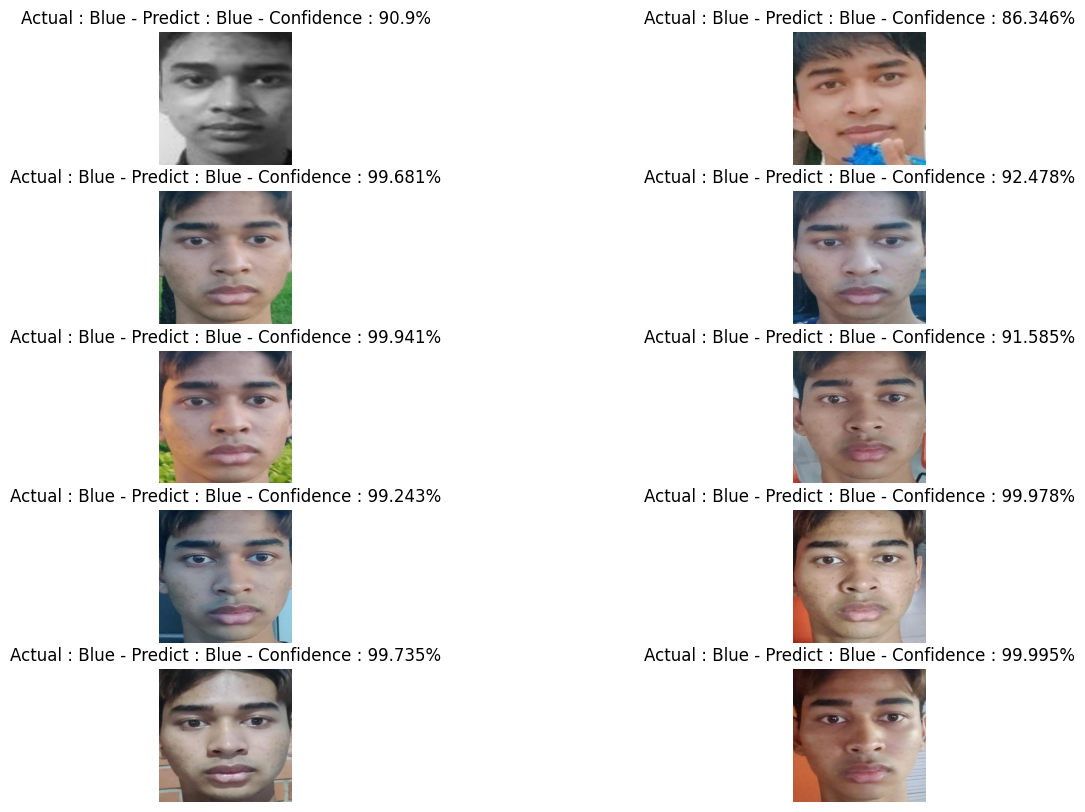

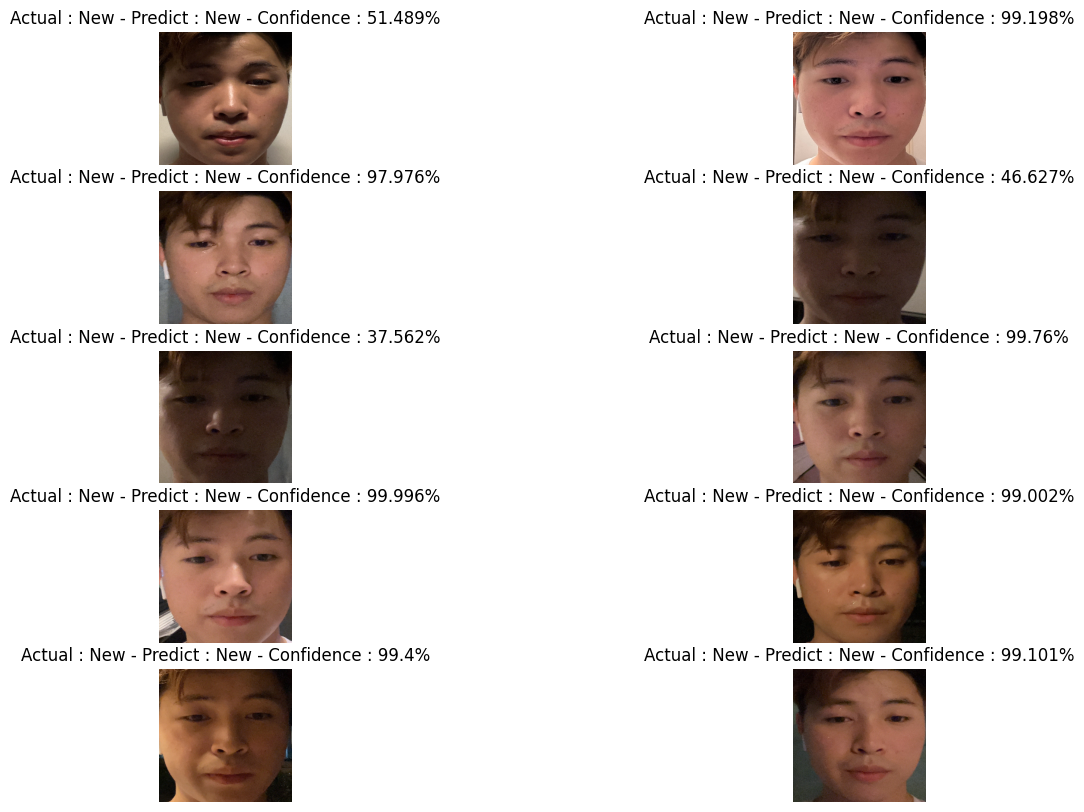

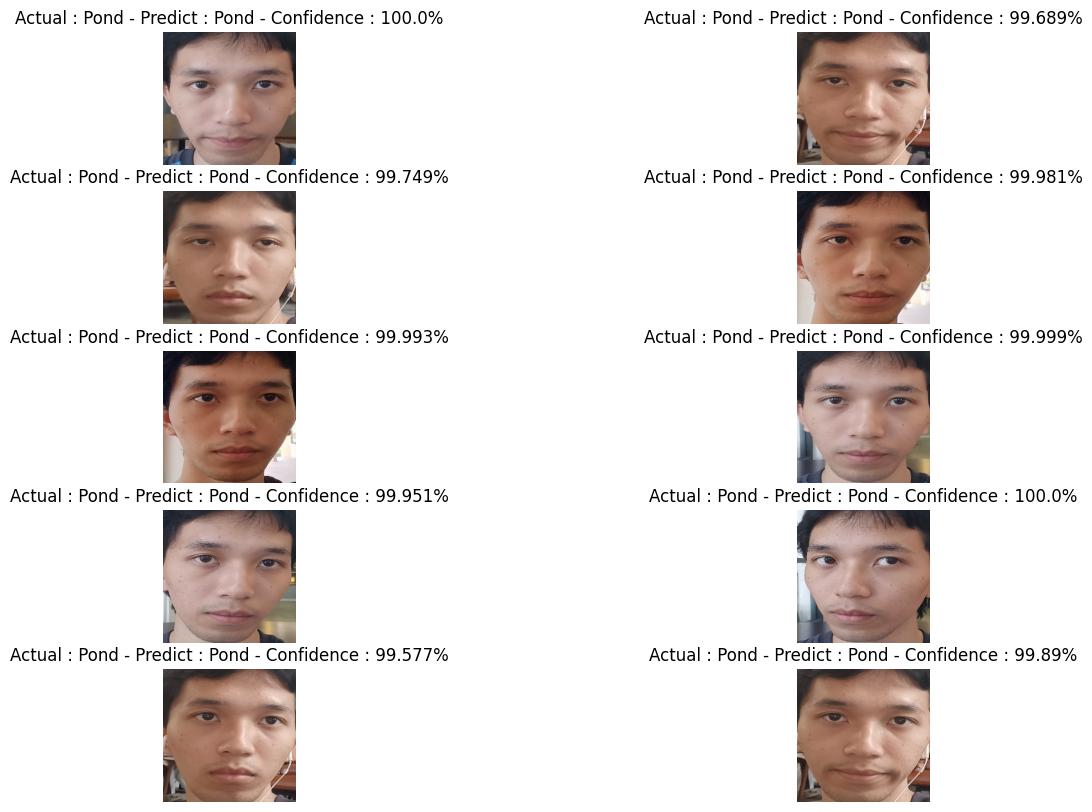

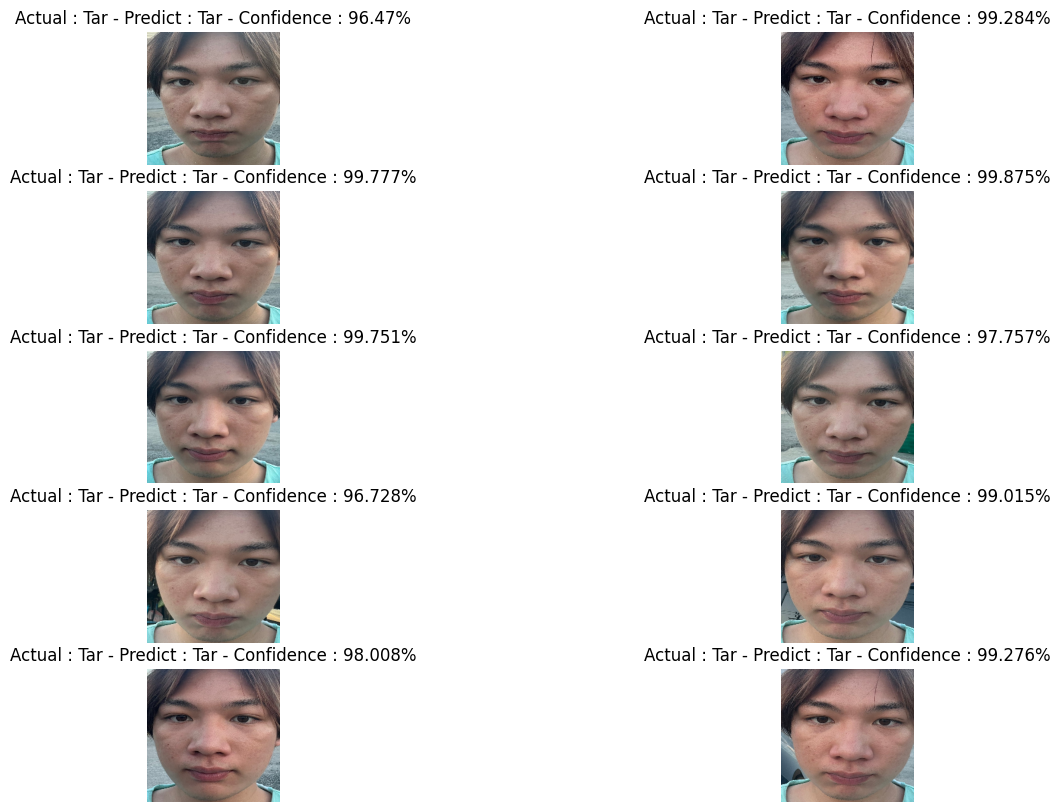

In [30]:
# plot each class by 2x5 rows and columns
import matplotlib.pyplot as plt
idx_classes = 0
for i in range(len(image_classes)):
    if i % 10 == 0:
        plt.figure(figsize=(15, 10))
        idx_classes += 1
    plt.subplot(5, 2, i%10+1)
    # add title with actual class and predicted class and probability
    plt.title('Actual : ' +image_classes[i][1] + ' - Predict : ' + image_classes[i][2] + ' - Confidence : ' + str(round(image_classes[i][3]*100, 3)) + '%')
    plt.imshow(cv2.cvtColor(image_classes[i][0], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    if i % 10 == 9:
        plt.show()


    




In [31]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=classes))
